## PCA, MDS and Isomap

### 1. Explorary Data Analysis

In [2]:
data = read.table("auto-mpg.txt", sep = "", header = F)
colnames(data) = c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", 
                   "origin", "car_name")
head(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [10]:
str(data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : chr  "130.0" "165.0" "150.0" "150.0" ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car_name    : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


In [15]:
options(warn = -1)
data$horsepower = as.numeric(data$horsepower)

In [16]:
summary(data)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration     model_year        origin        car_name        
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.57   Mean   :76.01   Mean   :1.573                     
 3rd Qu.:17.18   3rd

#### Boxplots

Using car_name as id variables



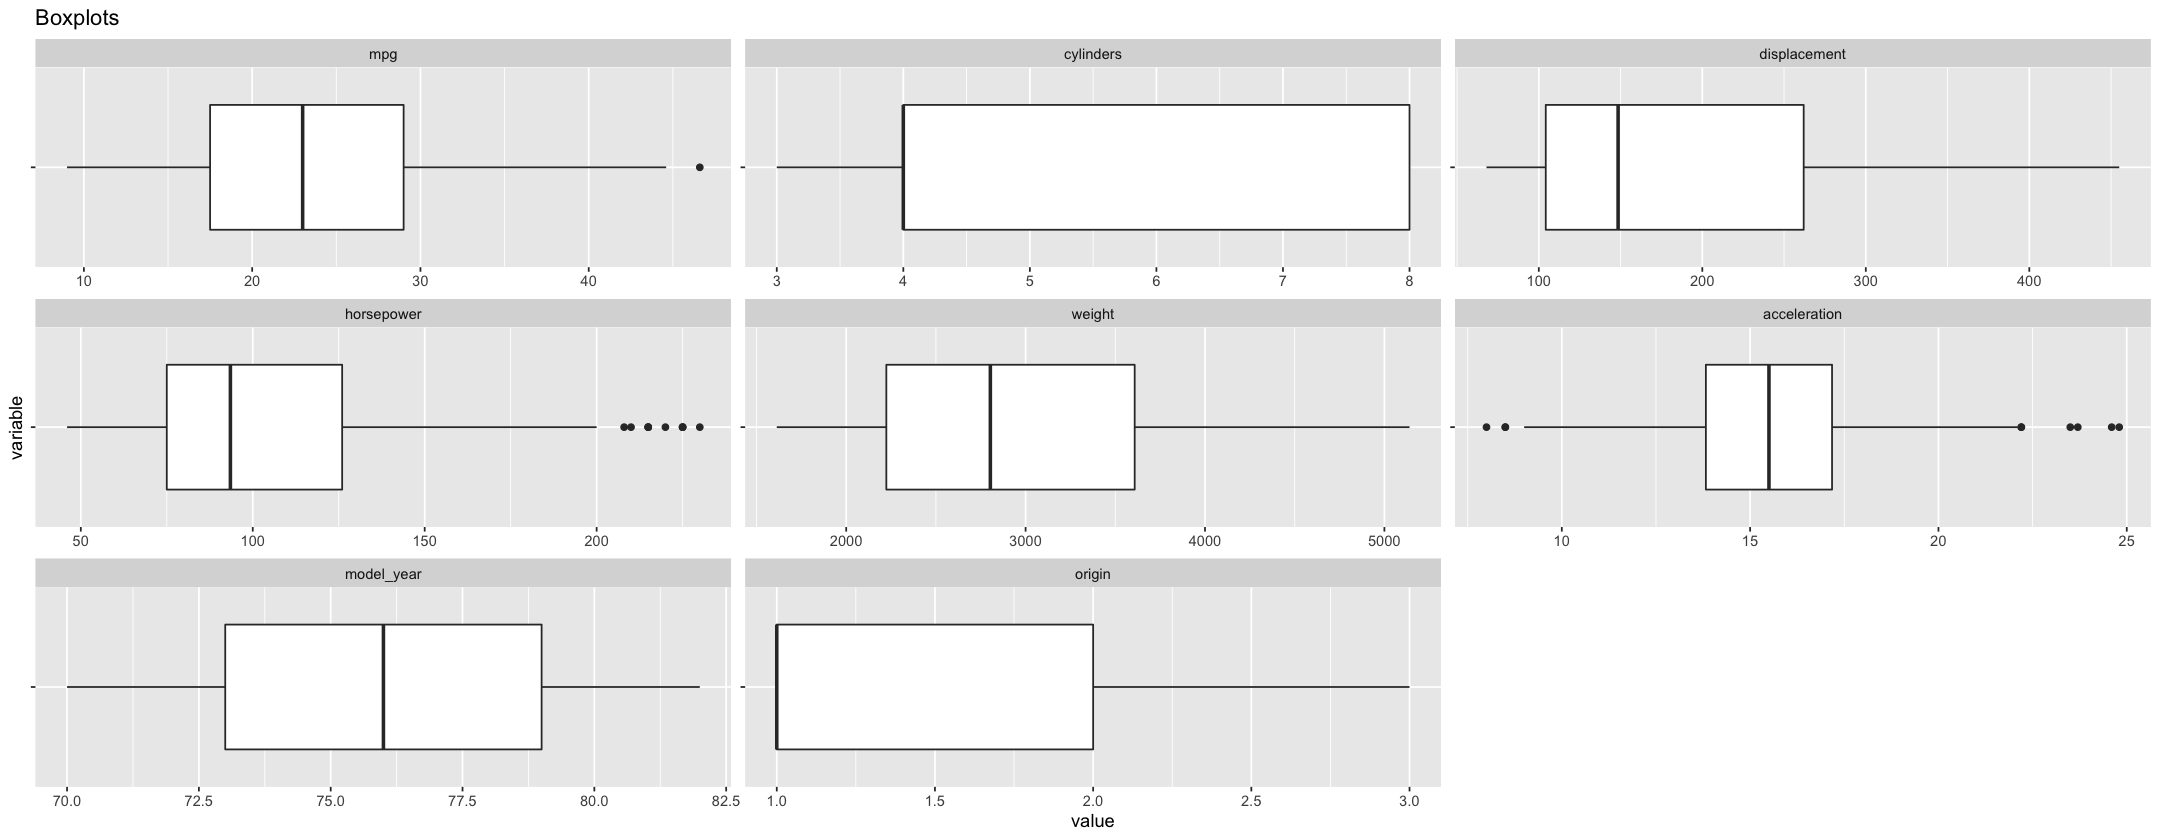

In [39]:
library(reshape2)
library(tidyverse)
df.m = melt(data)
options(repr.plot.width=18, repr.plot.height=7)
df.m %>% ggplot(mapping = aes(x = variable, y = value)) + 
    facet_wrap(~variable, ncol = 3, scales = "free") + 
    geom_boxplot() + 
    coord_flip() + theme(axis.text.y = element_blank()) + ggtitle("Boxplots")

#### Scatter Plots and Histograms

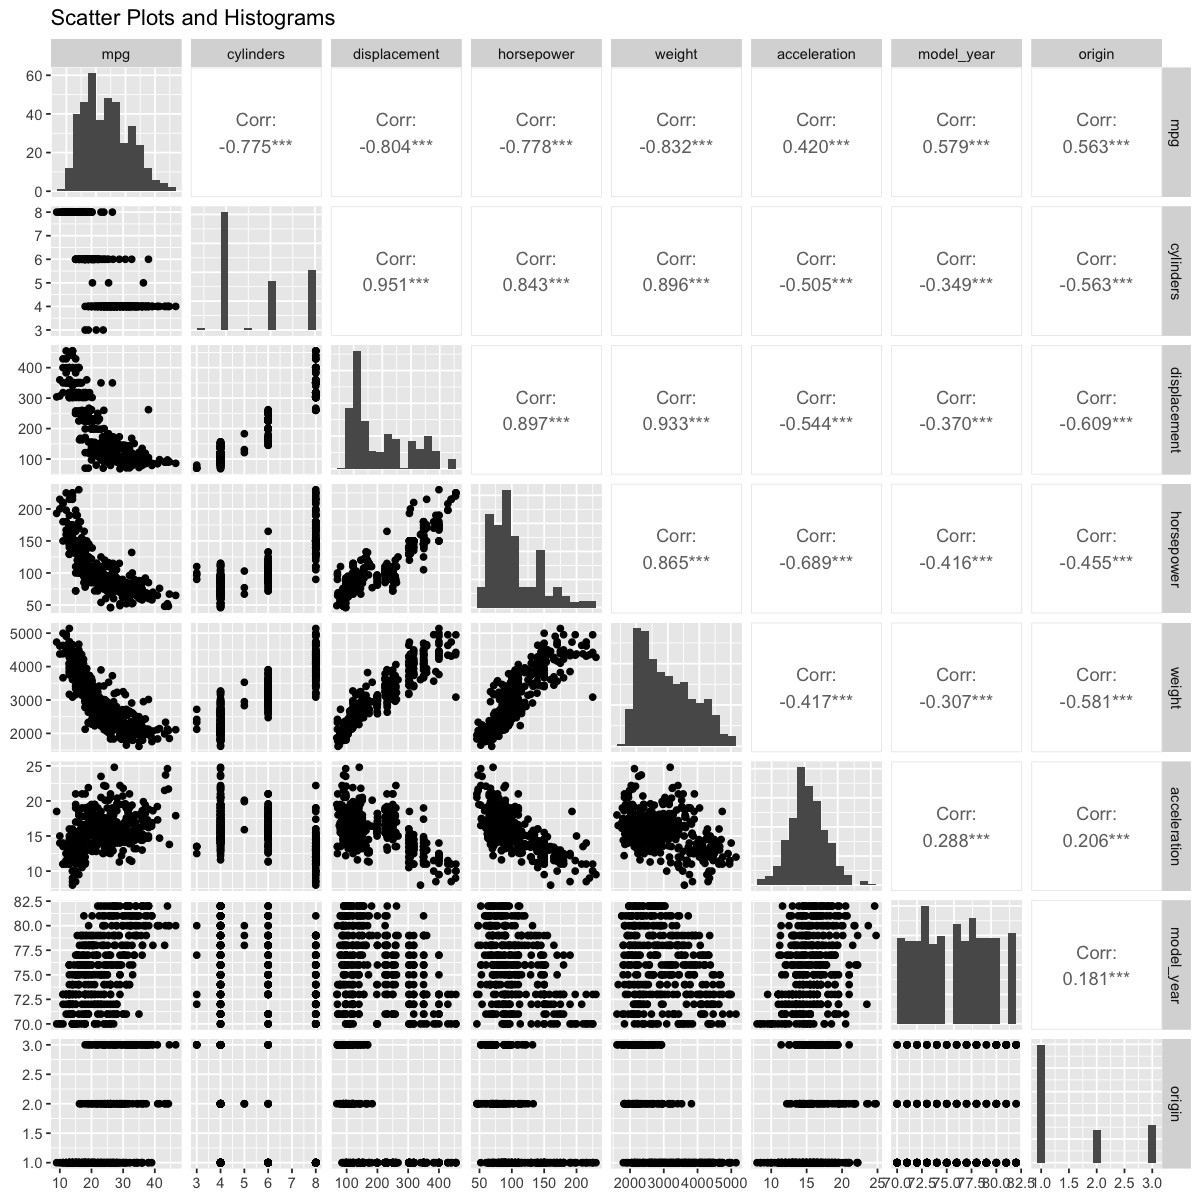

In [38]:
library(ggplot2)
library(GGally)
options(repr.plot.width=10, repr.plot.height=10)
ggpairs(data, columns = 1:(ncol(data)-1),
        diag = list(continuous = wrap("barDiag", bins=15), discrete = wrap("barDiag", bins = 15))
       ) + ggtitle("Scatter Plots and Histograms")

According to the boxplots, there is no obvious outliers for all variables except `horsepower` and `accelaration`. And based on the pair plots, we can see that there are obvious collinearity problems especially among `mpg`, `cylinders`, `horsepower`, `weight` and `accelaration`.

### 2. PCA

In [73]:
str(data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car_name    : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


`car_name` has too many different values (305 values for 398 samples) and it's character variable; `origin` is considered to be catergorical variable. So, here I use the other 7 variables to do PCA.

In [109]:
# PCA using covariance
X = data[, c(1:7)]
pca_cov_res = princomp(na.omit(X), cor = FALSE)
summary(pca_cov_res)

Importance of components:
                            Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     854.5910457 38.865860028 1.615443e+01 4.8154369111
Proportion of Variance   0.9975368  0.002063236 3.564477e-04 0.0000316726
Cumulative Proportion    0.9975368  0.999600082 9.999565e-01 0.9999882027
                             Comp.5       Comp.6       Comp.7
Standard deviation     2.348466e+00 1.688113e+00 5.216331e-01
Proportion of Variance 7.533223e-06 3.892381e-06 3.716571e-07
Cumulative Proportion  9.999957e-01 9.999996e-01 1.000000e+00

In [110]:
# PCA using correlation
pca_cor_res = princomp(na.omit(X), cor = TRUE)
summary(pca_cor_res)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.2384450 0.9303716 0.8534599 0.42885323 0.34916518
Proportion of Variance 0.7158051 0.1236559 0.1040563 0.02627358 0.01741662
Cumulative Proportion  0.7158051 0.8394610 0.9435173 0.96979087 0.98720749
                            Comp.6     Comp.7
Standard deviation     0.232931666 0.18785747
Proportion of Variance 0.007751023 0.00504149
Cumulative Proportion  0.994958510 1.00000000

We can see that if we use covariance to do the PCA, the `Comp.1` would account for almost all variance which is caused by large variance of some variable; but if we use correlation to do it, the `Comp.1` would only account for around 72% of variance. I think it makes more sense to use correlation instead of covariance in this case, and I'll use PCA on correlations to answer the following subquestions.

#### visualization

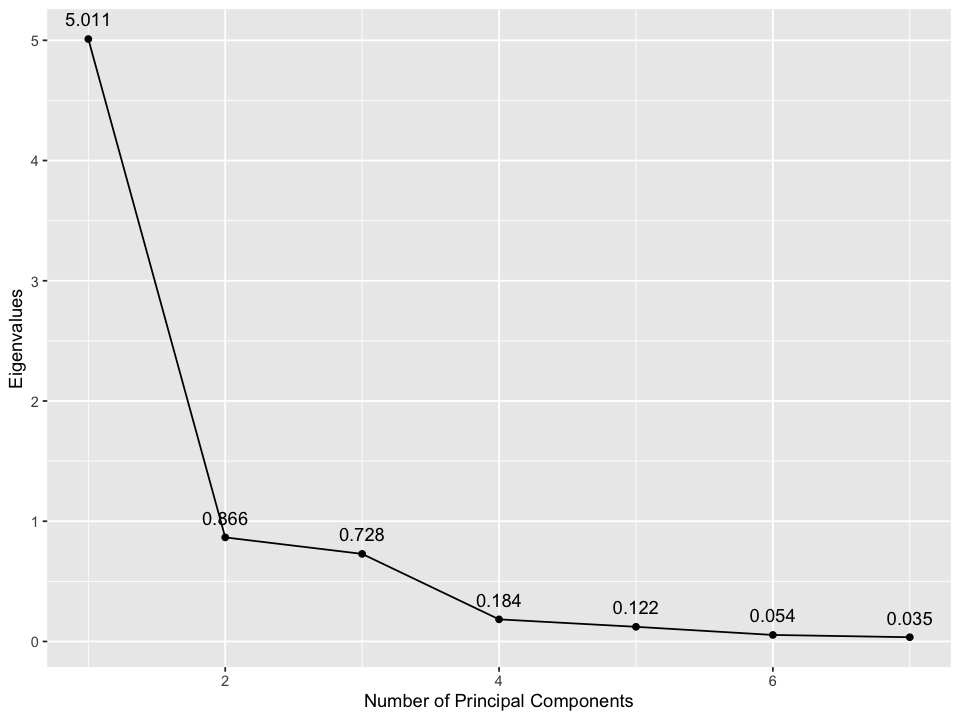

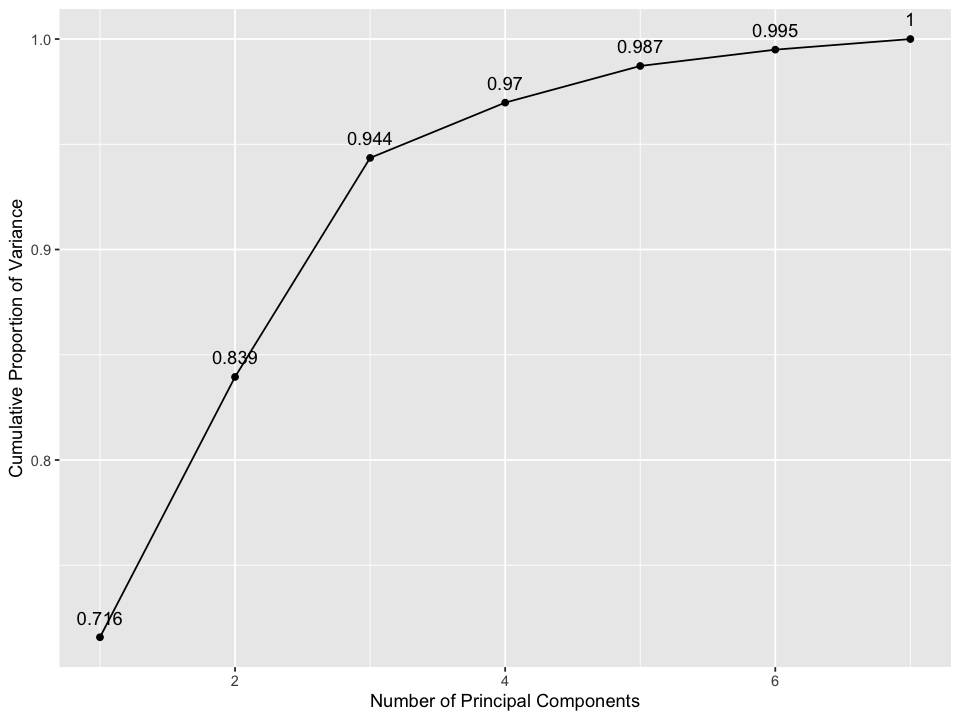

In [174]:
s = summary(pca_cor_res)
prop_var = cumsum(s$sdev^2)/sum(s$sdev^2)
eigenvalues = s$sdev^2
n = c(1:7)
options(repr.plot.width=8, repr.plot.height=6)
ggplot(mapping = aes(n, eigenvalues, label = eigenvalues)) + geom_point() +geom_line() + 
    xlab("Number of Principal Components") + ylab("Eigenvalues") + 
    geom_text(aes(label = round(eigenvalues, 3)), vjust = -1)
ggplot(mapping = aes(n, prop_var, label = prop_var)) + geom_point()+geom_line() + 
    xlab("Number of Principal Components") + ylab("Cumulative Proportion of Variance") + 
    geom_text(aes(label = round(prop_var, 3)), vjust = -1)

The first principal component has the largest eigenvalues which is over 5. It suggests that the first principal component accounts for most of the variance. The other principal components' corresponding eigenvalues are all smaller than 1. 

The increasing speed of cumulative proportion of variance decreases as number of principal compoments increases. The first 4 principal components would be enough to account for over 95% of variance and the first 6 principal components would account for almost 99% of variance.

In [112]:
s$loadings


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
mpg           0.398  0.207  0.257  0.751  0.341  0.210       
cylinders    -0.416  0.199 -0.139  0.477 -0.493 -0.333  0.432
displacement -0.429  0.180 -0.100  0.298         0.143 -0.813
horsepower   -0.423         0.170         0.711 -0.523       
weight       -0.414  0.225 -0.276 -0.108  0.265  0.697  0.367
acceleration  0.285        -0.893  0.121  0.231 -0.224       
model_year    0.230  0.910        -0.302        -0.128       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.143  0.143  0.143  0.143  0.143  0.143  0.143
Cumulative Var  0.143  0.286  0.429  0.571  0.714  0.857  1.000

`Comp.1` has roughly balanced loadings for each variable. It might be related to the size of cars. The relatively smaller cars might be able to run more miles per gallon (larger `mpg`) and need more time to accelerate (larger `acceleration`); and the smaller cars should have smaller `weight` and might have smaller `horsepower` and eigine `displacement`. 

`Comp.2`, `Comp.3`, `Comp.4`, `Comp.5`, `Comp.6` and `Comp.7` are most related to `model_year`, `accelaration`, `mpg`, `horsepower`, `weight` and `displacement` separately. 

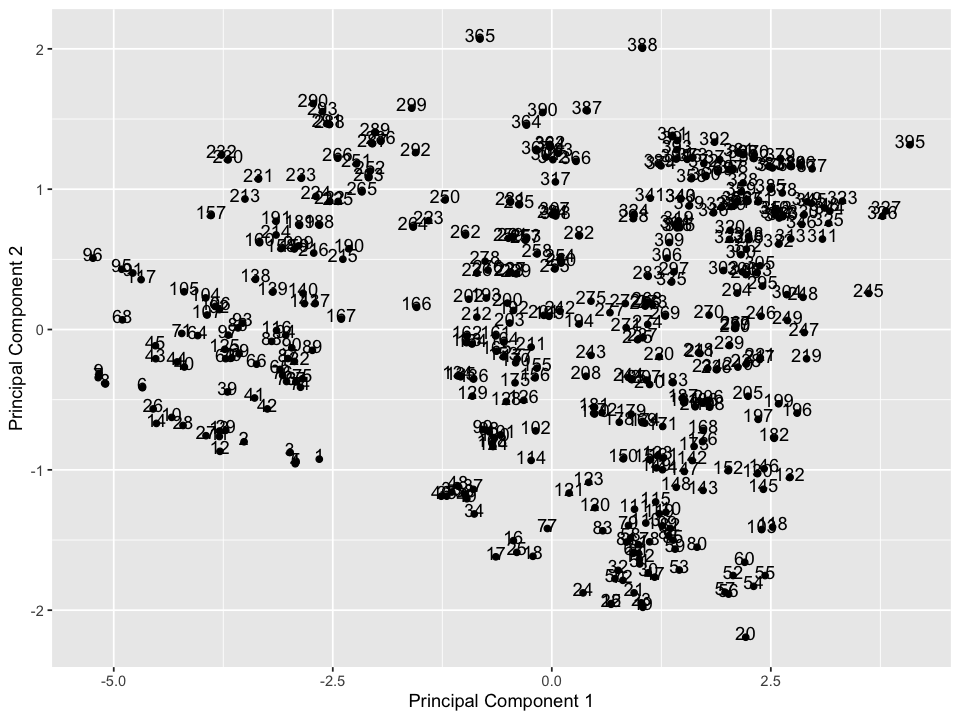

In [175]:
Xs = scale(X)
proj = as.data.frame(as.matrix(Xs) %*% s$loadings[, 1:2])
proj[, 'origin'] = as.factor(data[, 'origin'])
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data = proj, mapping = aes(Comp.1, Comp.2,label = 1:nrow(proj))) + geom_point() + 
    xlab('Principal Component 1') + ylab('Principal Component 2') + 
    geom_text(aes(label=1:nrow(proj)), vjust = 0.2)

The projection on the first 2 principal components approximately gives us 3 clusters. And based on the projection plot, the 20th, 365th, 388th, and 395th observations seem to be outliers.

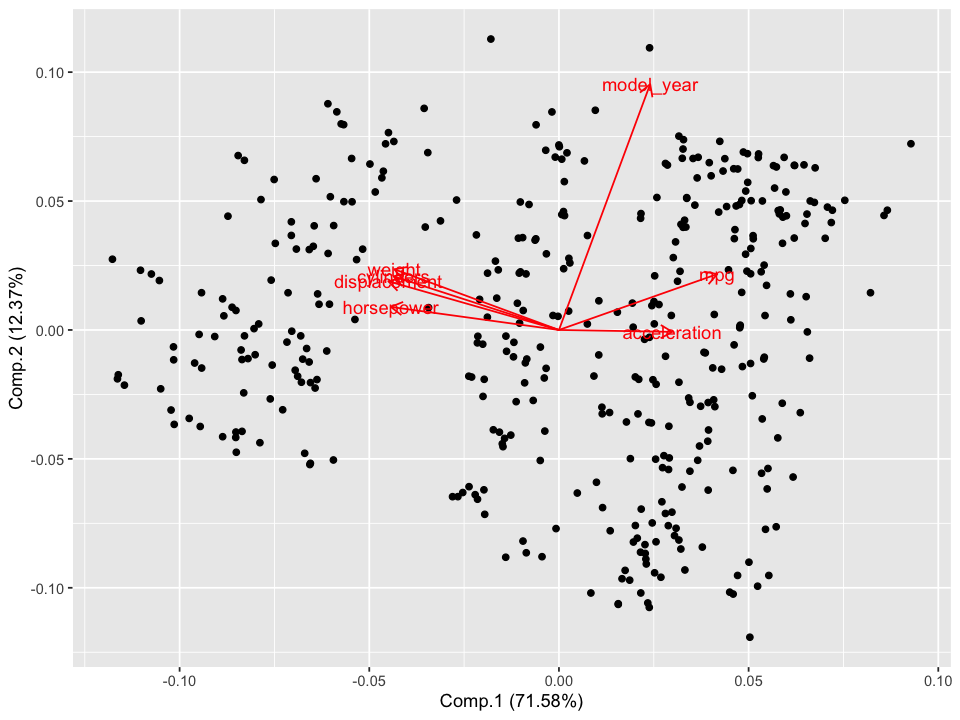

In [127]:
options(repr.plot.width = 8, repr.plot.height=6)
library(ggfortify)
autoplot(pca_cor_res, label = FALSE, loadings = TRUE, loadings.label = TRUE)

It can be found that all variables expect `model_year` have a large projected component along PC1 but a smaller projected component on PC2. `model_year` has a large projected component along PC2 direction but a smaller projected component along PC1 direction.

### 3. MDS

Let the disimilarity measure be:
$$d(x_i, x_j) = \frac{1}{p}\sum_{k=1}^p \delta(x_{ik}, x_{jk}),$$
which is the average of the dissimilarity for each variable.

If the $k$th variable is numeric, then the dissimilarity is the absolute value of the difference between two observations over the range of this variable:
$$\delta(x_{ik}, x_{jk}) = \frac{|x_{ik}-x_{jk}|}{\max_l\{x_{lk}\}-\min_l\{x_{lk}\}};$$
if the $k$th variable is catergorical, then the dissimilarity is 1 if two observations have different values for this variable and the dissimilarity is 0 if two observations have the same value for this variable:
$$\delta(x_{ik}, x_{jk}) =\begin{cases} 1 & \text{ if }x_{ik}=x_{jk}\\0 &\text{ if }x_{ik}\not=x_{jk}\end{cases}.$$
Under this measure, all $d(x_i, x_j)$ are in the range of $[0,1]$.

In [162]:
data_ = na.omit(data)
col_range = as.numeric(sapply(data_[, 1:7], function(x){max(x)-min(x)}))
dist = matrix(0, nrow = nrow(data_), ncol = nrow(data_))
for (i in 1:nrow(data_)){
    for (j in 1:i){
        num_part = abs(data_[i, 1:7]-data_[j, 1:7])/col_range
        cat_part = (data_[i, 8]!=data_[j, 8])+(data_[i, 9]!=data_[j, 9])
        dist[i,j] = (sum(num_part, na.rm = T)+sum(cat_part))/9
    }
}
dist = (dist + t(dist))/2

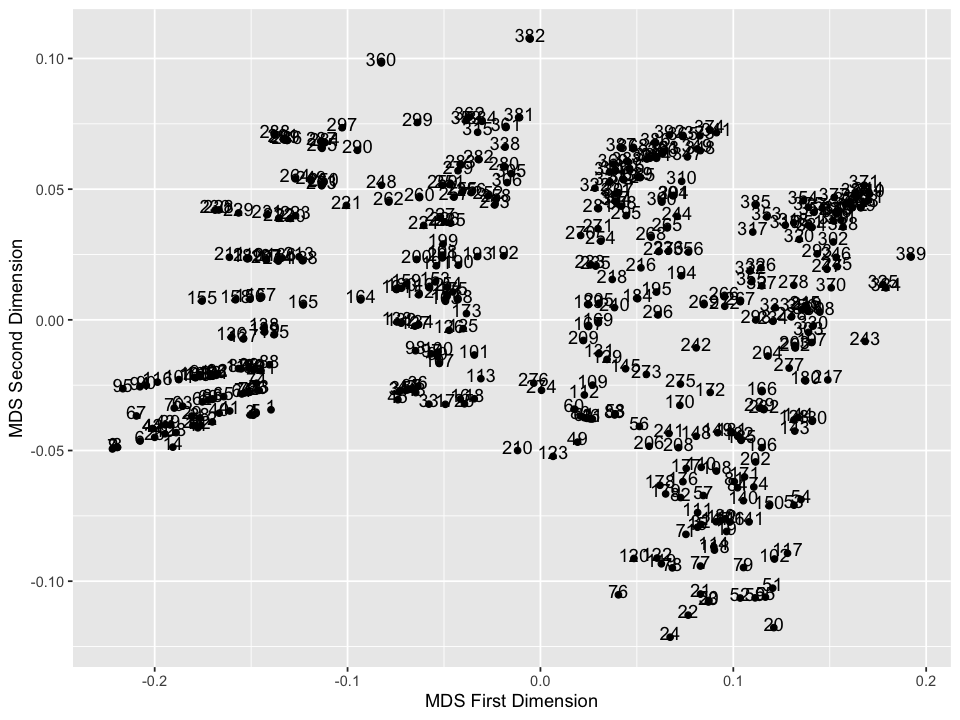

In [176]:
# MDS 2d
proj_mds = as.data.frame(cmdscale(dist, k = 2))
proj_mds[,'origin'] = as.factor(data_[,'origin'])
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data = proj_mds, mapping = aes(V1, V2, label = 1:nrow(proj_mds))) + geom_point() + 
    xlab('MDS First Dimension') + ylab('MDS Second Dimension') + 
    geom_text(aes(label=1:nrow(proj_mds)), vjust = 0.2)

The MDS gives pretty similar projection to the PCA. However, it seems that MDS gives us 4 clusters instead of 3 clusters given by PCA. Besides, MDS has different potential outliers with PCA, which are 360th and 382nd observations.

### 4. Isomap

I tried the Isomap in this question.

In [210]:
library(dimRed)
datas = scale(data_[, 1:7])
emb = embed(datas, 'Isomap', .mute = NULL)

2022-04-08 16:23:27: Isomap START

2022-04-08 16:23:27: constructing knn graph

2022-04-08 16:23:27: calculating geodesic distances

2022-04-08 16:23:27: Classical Scaling



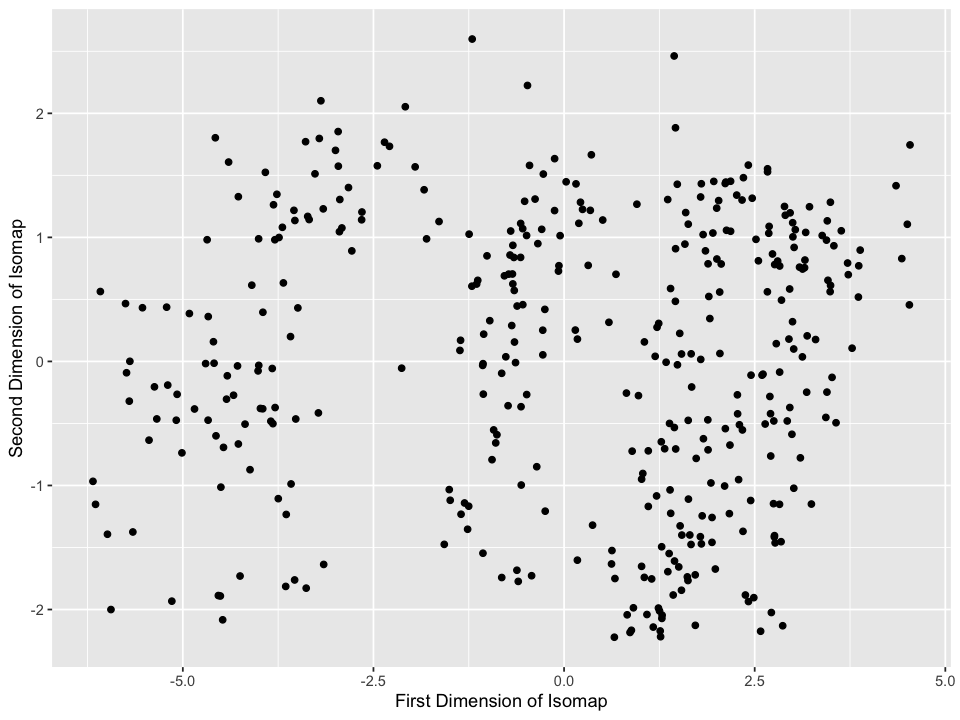

In [212]:
proj_iso = as.data.frame(emb)[, 1:2]
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data = proj_iso, mapping = aes(iso.1, iso.2, label = 1:nrow(proj_iso))) + geom_point() + 
    xlab('First Dimension of Isomap') + ylab('Second Dimension of Isomap') 

The clusters given by Isomap are similar to PCA and MDS. More similar to PCA, Isomap gives approximately 3 clusters. But it seems that Isomap suggests more potential outliers than PCA and MDS.